In [1]:
import pandas as pd 
import seaborn as sns
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib.colors as col

In [2]:
df_googlebooks1= pd.read_csv('google_books_1299.csv', header=0, delimiter=',')

In [3]:
df_googlebooks1.head()

,Unnamed: 0,title,author,rating,voters,price,currency,description,publisher,page_count,generes,ISBN,language,published_date
0,0,Attack on Titan: Volume 13,Hajime Isayama,4.6,428,43.28,SAR,NO SAFE PLACE LEFT At great cost to the Garris...,Kodansha Comics,192,none,9781612626864,English,"Jul 31, 2014"
1,1,Antiques Roadkill: A Trash 'n' Treasures Mystery,Barbara Allan,3.3,23,26.15,SAR,Determined to make a new start in her quaint h...,Kensington Publishing Corp.,288,"Fiction , Mystery &amp, Detective , Cozy , Gen...",9780758272799,English,"Jul 1, 2007"
2,2,The Art of Super Mario Odyssey,Nintendo,3.9,9,133.85,SAR,Take a globetrotting journey all over the worl...,Dark Horse Comics,368,"Games &amp, Activities , Video &amp, Electronic",9781506713816,English,"Nov 5, 2019"
3,3,Getting Away Is Deadly: An Ellie Avery Mystery,Sara Rosett,4.0,10,26.15,SAR,"With swollen feet and swelling belly, pregnant...",Kensington Publishing Corp.,320,none,9781617734076,English,"Mar 1, 2009"
4,4,"The Painted Man (The Demon Cycle, Book 1)",Peter V. Brett,4.5,577,28.54,SAR,The stunning debut fantasy novel from author P...,HarperCollins UK,544,"Fiction , Fantasy , Dark Fantasy",9780007287758,English,"Jan 8, 2009"


In [4]:
df_googlebooks1.shape

(1299, 14)

In [5]:
df_googlebooks1.isna().sum()

Unnamed: 0         0
title              0
author             0
rating            75
voters            75
price              0
currency           0
description        3
publisher          0
page_count         0
generes            0
ISBN               0
language           0
published_date     0
dtype: int64

In [6]:
df_googlebooks1.columns

Index(['Unnamed: 0', 'title', 'author', 'rating', 'voters', 'price',
       'currency', 'description', 'publisher', 'page_count', 'generes', 'ISBN',
       'language', 'published_date'],
      dtype='object')

In [7]:
df_googlebooks1.dtypes

Unnamed: 0          int64
title              object
author             object
rating            float64
voters             object
price             float64
currency           object
description        object
publisher          object
page_count          int64
generes            object
ISBN               object
language           object
published_date     object
dtype: object

In [8]:
#Drop missing values in the ratings column as those are relevant for our project
df_googlebooks1 = df_googlebooks1.dropna(subset=["rating"])
df_googlebooks1.isna().sum()

Unnamed: 0        0
title             0
author            0
rating            0
voters            0
price             0
currency          0
description       3
publisher         0
page_count        0
generes           0
ISBN              0
language          0
published_date    0
dtype: int64

In [9]:
df_googlebooks1.groupby(['rating']).size()

rating
2.5     11
3.3      8
3.5      9
3.6      4
3.7     17
3.8     32
3.9     29
4.0    105
4.1     62
4.2     53
4.3    101
4.4    109
4.5    175
4.6    163
4.7    139
4.8     79
4.9     20
5.0    108
dtype: int64

Ratings range from 2.5 to 5.0. This is checked by the groupby.size() function.

In [10]:
#checking how many genres there are
df_googlebooks1.groupby(['generes']).size()

generes
Art , Popular Culture                                                    1
Art , Video Game Art                                                     1
Biography &amp, Autobiography , Business                                 1
Biography &amp, Autobiography , Entertainment &amp, Performing Arts      2
Biography &amp, Autobiography , Environmentalists &amp, Naturalists      1
                                                                      ... 
Young Adult Fiction , Fantasy , Dark Fantasy                             1
Young Adult Fiction , Fantasy , Epic                                     2
Young Adult Fiction , Humorous , General                                 1
Young Adult Fiction , Science Fiction , Alien Contact                    1
none                                                                   499
Length: 226, dtype: int64

In [11]:
df_googlebooks1.drop(df_googlebooks1[df_googlebooks1['generes'] == "none"].index, inplace = True)
df_googlebooks1.groupby(["generes"]).size()

generes
Art , Popular Culture                                                  1
Art , Video Game Art                                                   1
Biography &amp, Autobiography , Business                               1
Biography &amp, Autobiography , Entertainment &amp, Performing Arts    2
Biography &amp, Autobiography , Environmentalists &amp, Naturalists    1
                                                                      ..
Young Adult Fiction , Family , General                                 1
Young Adult Fiction , Fantasy , Dark Fantasy                           1
Young Adult Fiction , Fantasy , Epic                                   2
Young Adult Fiction , Humorous , General                               1
Young Adult Fiction , Science Fiction , Alien Contact                  1
Length: 225, dtype: int64

https://sparkbyexamples.com/pandas/pandas-delete-rows-based-on-column-value/

In [12]:
df_googlebooks1['generes'].apply(lambda x: x.replace(',', '').replace('&amp', '').split())
df_googlebooks1['genres'] = df_googlebooks1['generes'].apply(lambda x: ' '.join(x.replace(',', '').replace('&amp', '').split()))

In [13]:
def clean_up_genres(x):
    x = x.replace(',', '').replace('&amp', '')
    return x

df_googlebooks1['genres'] = df_googlebooks1['generes'].apply(clean_up_genres)
df_googlebooks1['genres']

1        Fiction  Mystery  Detective  Cozy  General
2              Games  Activities  Video  Electronic
4                    Fiction  Fantasy  Dark Fantasy
6                             Fiction  Media Tie-In
7                            Fiction  Fantasy  Epic
                           ...                     
1287                                Fiction  Horror
1289        Self-Help  Personal Growth  Self-Esteem
1294                  Medical  Health Care Delivery
1295    Psychology  Cognitive Psychology  Cognition
1298                   Fiction  Thrillers  Suspense
Name: genres, Length: 725, dtype: object

In [14]:
s = df_googlebooks1.apply(lambda x: pd.Series(x['genres'].split()) ,axis=1).stack().reset_index(level=1, drop=True)
s.name = 'new_genres'
df_googlebooks1 = df_googlebooks1.join(s)

df_googlebooks1[['new_genres', 'title', 'rating', 'voters', 'published_date']].head(10)

,new_genres,title,rating,voters,published_date
1,Fiction,Antiques Roadkill: A Trash 'n' Treasures Mystery,3.3,23,"Jul 1, 2007"
1,Mystery,Antiques Roadkill: A Trash 'n' Treasures Mystery,3.3,23,"Jul 1, 2007"
1,Detective,Antiques Roadkill: A Trash 'n' Treasures Mystery,3.3,23,"Jul 1, 2007"
1,Cozy,Antiques Roadkill: A Trash 'n' Treasures Mystery,3.3,23,"Jul 1, 2007"
1,General,Antiques Roadkill: A Trash 'n' Treasures Mystery,3.3,23,"Jul 1, 2007"
2,Games,The Art of Super Mario Odyssey,3.9,9,"Nov 5, 2019"
2,Activities,The Art of Super Mario Odyssey,3.9,9,"Nov 5, 2019"
2,Video,The Art of Super Mario Odyssey,3.9,9,"Nov 5, 2019"
2,Electronic,The Art of Super Mario Odyssey,3.9,9,"Nov 5, 2019"
4,Fiction,"The Painted Man (The Demon Cycle, Book 1)",4.5,577,"Jan 8, 2009"


In [15]:
df_googlebooks1["new_genres"].value_counts()

Fiction              465
General              165
Fantasy              118
Mystery              115
Detective            108
                    ... 
Environmentalists      1
Protection             1
Conservation           1
Environmental          1
Delivery               1
Name: new_genres, Length: 276, dtype: int64

In [16]:
df_googlebooks1["new_genres"].describe()

count        2791
unique        276
top       Fiction
freq          465
Name: new_genres, dtype: object

<AxesSubplot:>

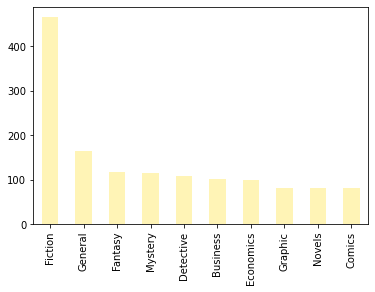

In [30]:
df_googlebooks1["new_genres"].value_counts()[:10].plot(kind='bar')

In [19]:
df_googlebooks1["rating"].describe()

count    2791.000000
mean        4.423540
std         0.426473
min         2.500000
25%         4.200000
50%         4.500000
75%         4.700000
max         5.000000
Name: rating, dtype: float64